In [14]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10   # Time and Hz, i.e. labels
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15  # Time(x) tick values
plt.rcParams['ytick.labelsize'] = 15  # Hz(y) tick values
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 14   # Title font

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
PI2 = np.pi * 2

import soundcard as sc
import IPython.display as ipd

from constants import *

# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()

from guitar_tuner import make_spectrum

def freq2key(freq):
    frequencies = np.array(list(KEY_FREQUENCY_MAP_PIANO.values()))
    return FREQUENCY_KEY_MAP_PIANO[
        frequencies[
            np.argmin(
                np.abs(frequencies - freq)
                )
            ]
        ]

In [2]:
with open('key_freq_mapping') as f:
    lines = f.read().splitlines()
kf_map = { float(l.split()[1]):l.split()[0] for l in lines}

KEYS = list(kf_map.values())
FREQS = np.array(list(kf_map.keys()))

## Compare octaves
### b3

In [19]:
b3_wave = thinkdsp.read_wave('data/b3.wav')
display(b3_wave.make_audio())

spectrum = b3_wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[200, 300])

No handles with labels found to put in legend.


# b4

No handles with labels found to put in legend.


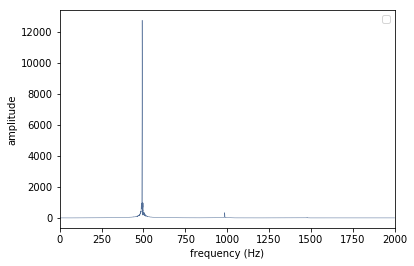

In [7]:
b4_wave = thinkdsp.read_wave('data/b4.wav')
display(b4_wave.make_audio())

spectrum = b4_wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 2000])

# b2

In [25]:
b2_wave = thinkdsp.read_wave('data/b2.wav')
display(b2_wave.make_audio())

spectrum = b2_wave.make_spectrum()
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[50, 300])

No handles with labels found to put in legend.


# Analyze interactively

No handles with labels found to put in legend.


b3 247.0


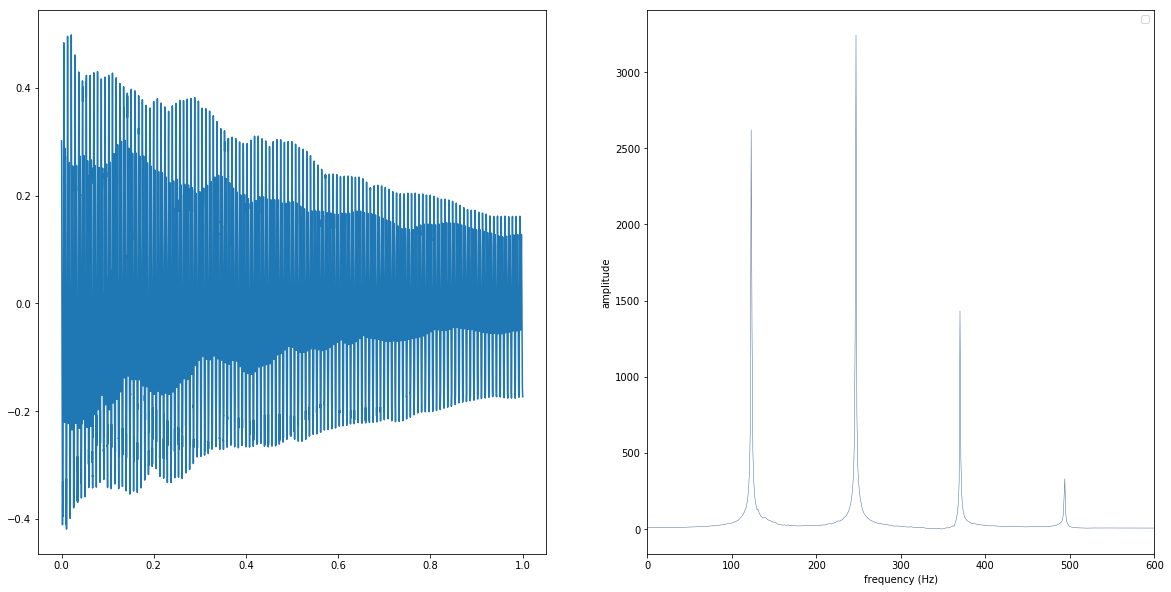

In [29]:
ys = default_mic.record(samplerate=44100, numframes=44100*2, channels=1)
ys = ys[44100:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)

## Different instruments have different timbre. 

### b2 of Yamaha P-115 Grand Piano

No handles with labels found to put in legend.


b3 247.0


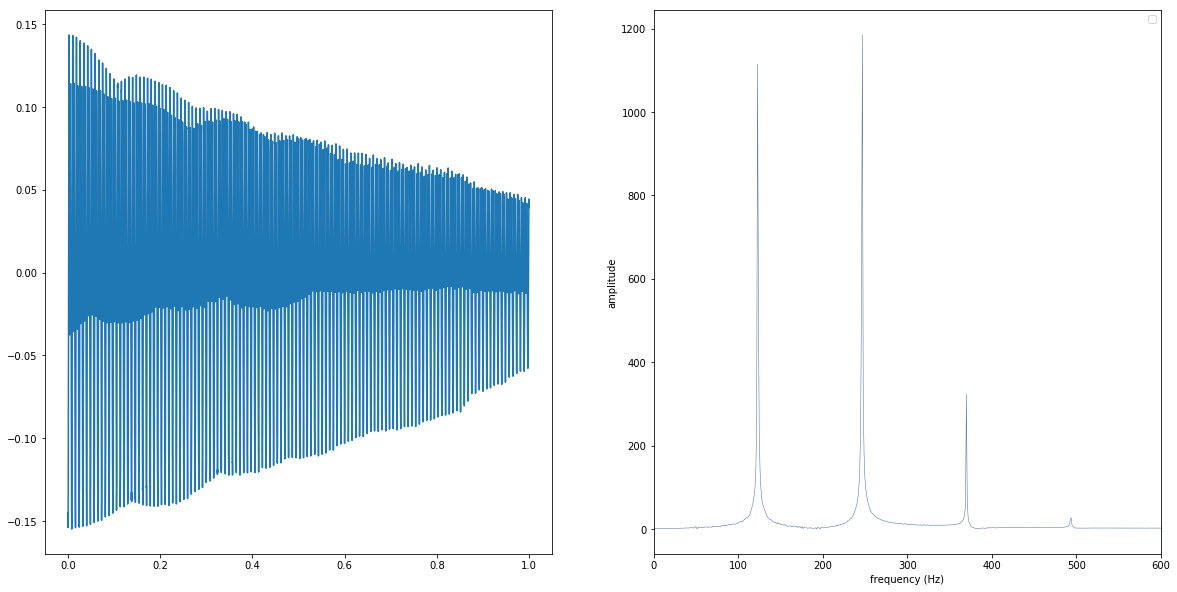

In [33]:
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

### b2 of Yamaha P-115 Bright Piano

No handles with labels found to put in legend.


b2 123.0


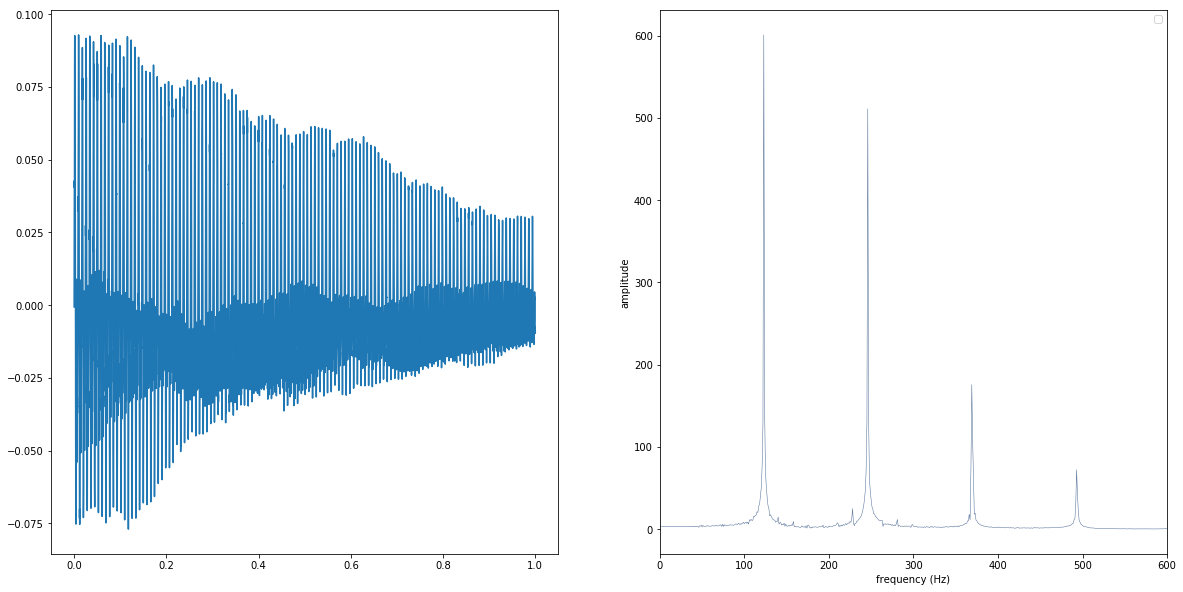

In [34]:
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

### b2 of Yamaha P-115 Mellow Grand Piano

No handles with labels found to put in legend.


b2 123.0


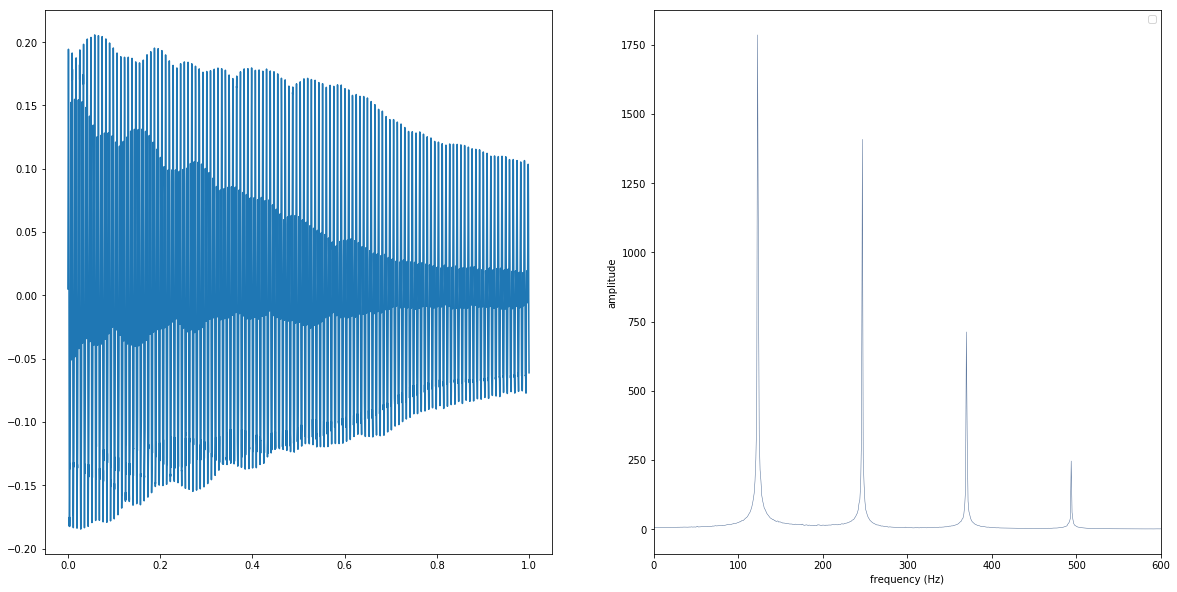

In [36]:
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

In [38]:
spectrum.peaks()[:5]

[(1785.6117122730882, 123.0),
 (1408.3044057007987, 247.0),
 (979.2455660092866, 124.0),
 (712.3963924993108, 370.0),
 (398.5821160716068, 122.0)]

# Inpect low keys in pianos

## c1

No handles with labels found to put in legend.


c2 131.0


/Users/parks1/miniconda3/envs/pitch-detector/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


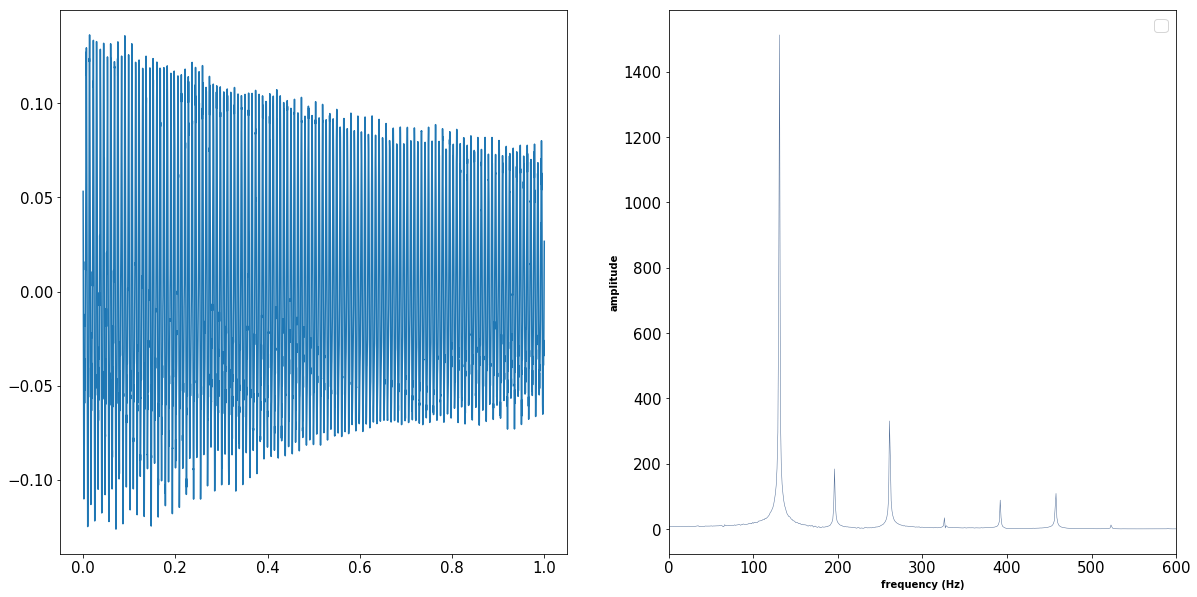

In [48]:
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

No handles with labels found to put in legend.


c2 131.0


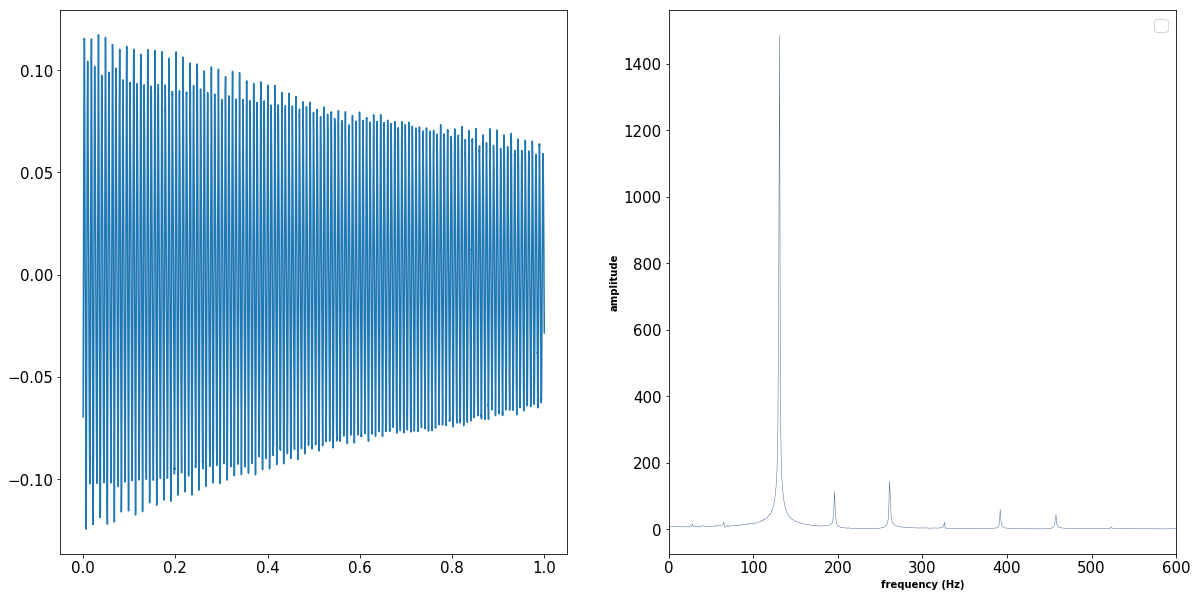

In [53]:
# Without ambient noise reduction
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

## c0

No handles with labels found to put in legend.


c2 130.0


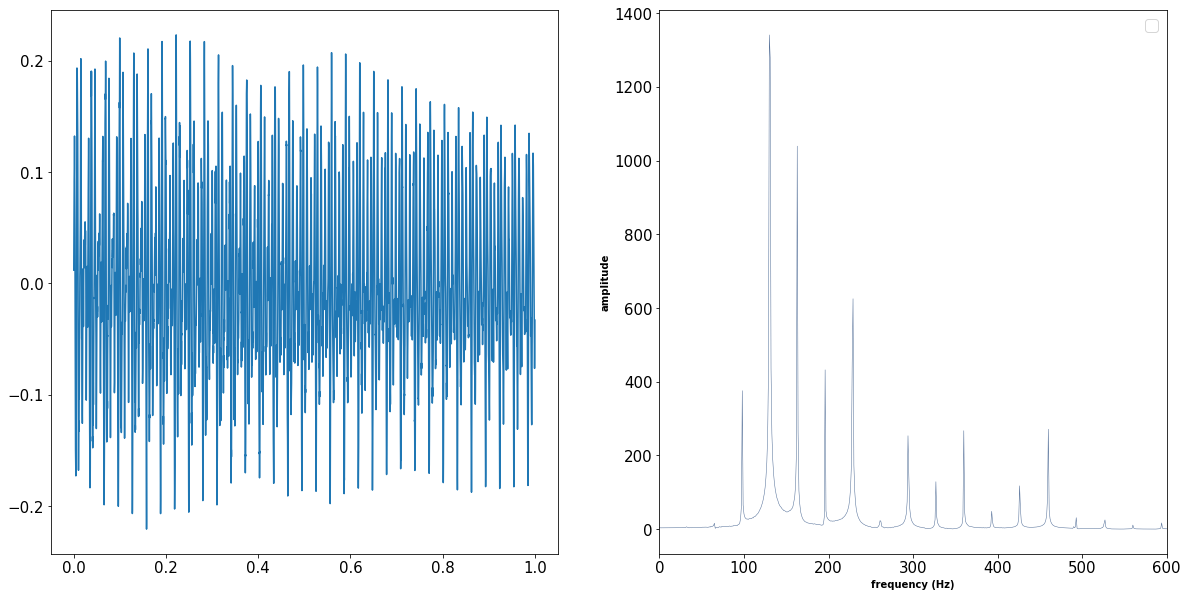

In [52]:
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

In [54]:
# Without ambient noise reduction
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

No handles with labels found to put in legend.


c2 130.0


## A#2 is the lowest key that can be detected. 

### Compare a#2 and b1

In [55]:
# Without ambient noise reduction
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

No handles with labels found to put in legend.


a#2 116.0


No handles with labels found to put in legend.


a3 220.0


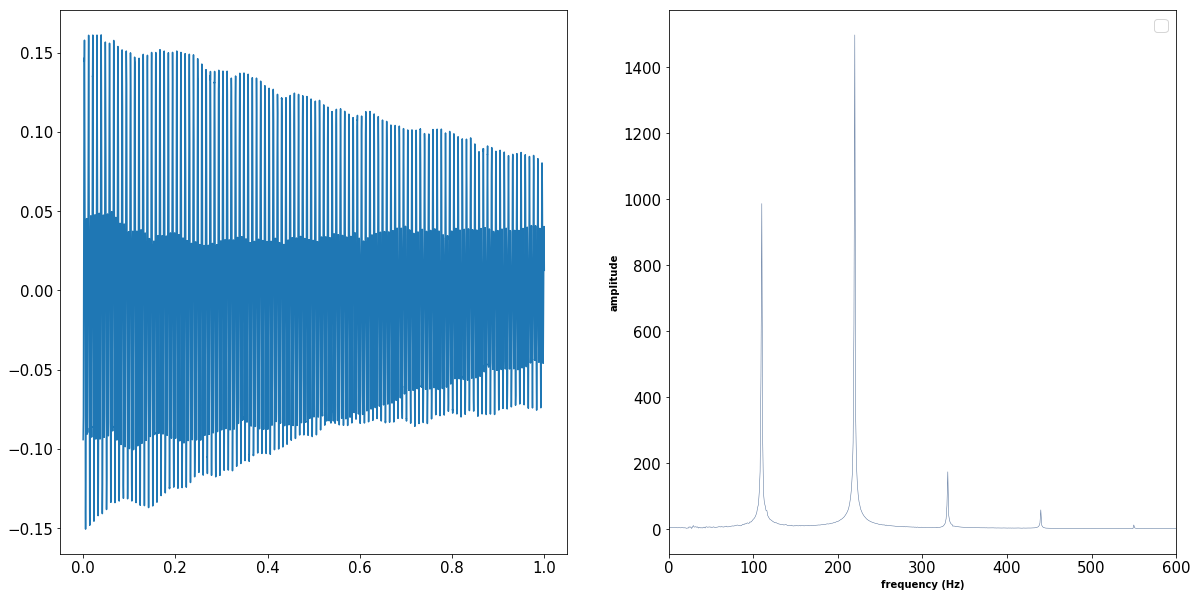

In [56]:
# Without ambient noise reduction
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 600])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

## Let's see how low my MBP can pick up

Seems like d1 is the last signal you can still see its peak

In [70]:
# Without ambient noise reduction
wave = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys, full=True)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[50, 200])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)

No handles with labels found to put in legend.


d2 147.0


In [ ]:
spectrum.peak

In [ ]:
np.fft.rfft()

# Let's inspect a guitar

## 

/Users/parks1/miniconda3/envs/pitch-detector/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


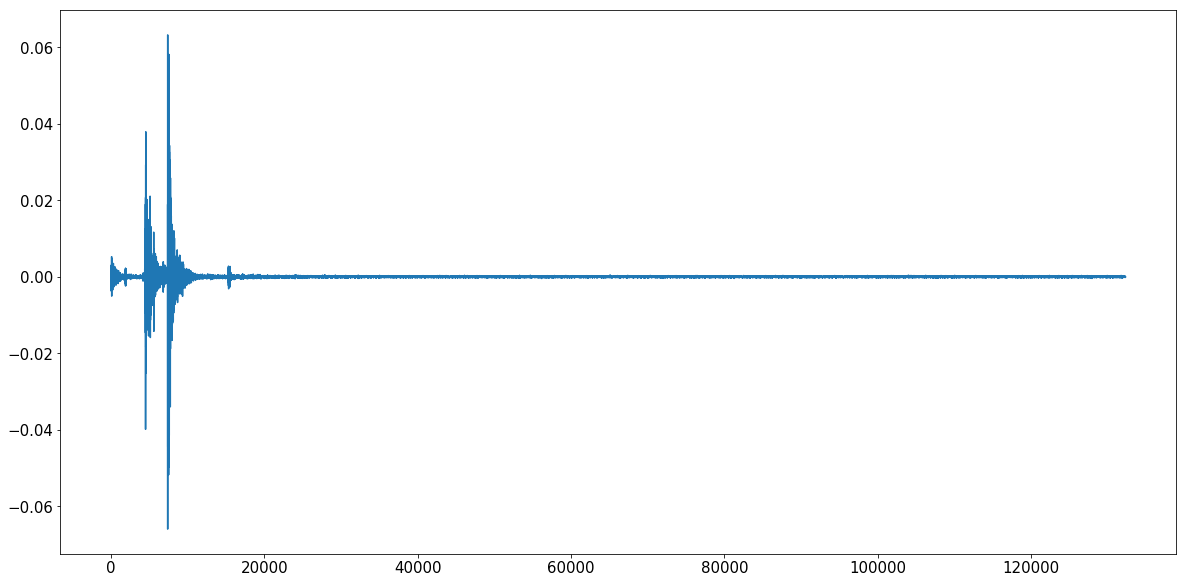

In [44]:
ambient = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
plt.figure(figsize=(20, 10))
plt.plot(ambient, )

In [46]:
ambient = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
plt.figure(figsize=(20, 10))
plt.plot(ambient, )

In [47]:
ambient = default_mic.record(samplerate=44100, numframes=44100*3, channels=1)
plt.figure(figsize=(20, 10))
plt.plot(ambient, )